# Model Training

In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))


In [2]:
from scripts.data_preprocessing import load_data
from scripts.train_model import train_model,split_data,hyperparameter_tuning,evaluate_model, plot_feature_importances,tune_model
import config

In [3]:
df = load_data(config.PROCESSED_DATA_PATH) 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,insulin_resistance_index,...,Pregnancies_age_interaction,bmi_glucose_interaction,blood_pressure_age_interaction,insulin_sensitivity_index,glucose_2,age_2,BMI_2,metabolic_syndrome_score,diabetes_risk_factors_count,glycemic_load
0,0.813399,148.0,72.0,3.583519,5.336798,33.6,0.821764,1.364180,1,75.588224,...,300,4972.8,3600.0,0.000033,21904.0,2500,1128.96,2,3,14.8
1,-0.833906,85.0,66.0,3.401197,4.877392,26.6,-0.168409,0.126452,0,27.344370,...,31,2261.0,2046.0,0.000090,7225.0,961,707.56,0,0,8.5
2,1.188996,183.0,64.0,3.526361,5.336798,23.3,0.935284,0.230161,1,93.463818,...,256,4263.9,2048.0,0.000026,33489.0,1024,542.89,1,1,18.3
3,-0.833906,89.0,66.0,3.178054,4.553877,28.1,-1.298725,-1.480075,0,20.656790,...,21,2500.9,1386.0,0.000120,7921.0,441,789.61,0,0,8.9
4,-1.603317,137.0,40.0,3.583519,5.129899,43.1,2.336680,0.327328,1,56.829630,...,0,5904.7,1320.0,0.000043,18769.0,1089,1857.61,1,1,13.7


In [4]:
X_train, X_test, y_train, y_test = split_data(df)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 23), (154, 23), (614,), (154,))

In [5]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42 )
model = train_model(model,X_train, y_train)
metric = evaluate_model(model, X_test, y_test)

Accuracy: 0.88
Confusion Matrix:
[[92  8]
 [10 44]]
Classification Report:
{'0': {'precision': 0.9019607843137255, 'recall': 0.92, 'f1-score': 0.9108910891089109, 'support': 100.0}, '1': {'precision': 0.8461538461538461, 'recall': 0.8148148148148148, 'f1-score': 0.8301886792452831, 'support': 54.0}, 'accuracy': 0.8831168831168831, 'macro avg': {'precision': 0.8740573152337858, 'recall': 0.8674074074074074, 'f1-score': 0.870539884177097, 'support': 154.0}, 'weighted avg': {'precision': 0.8823921176862354, 'recall': 0.8831168831168831, 'f1-score': 0.8825928414943921, 'support': 154.0}}


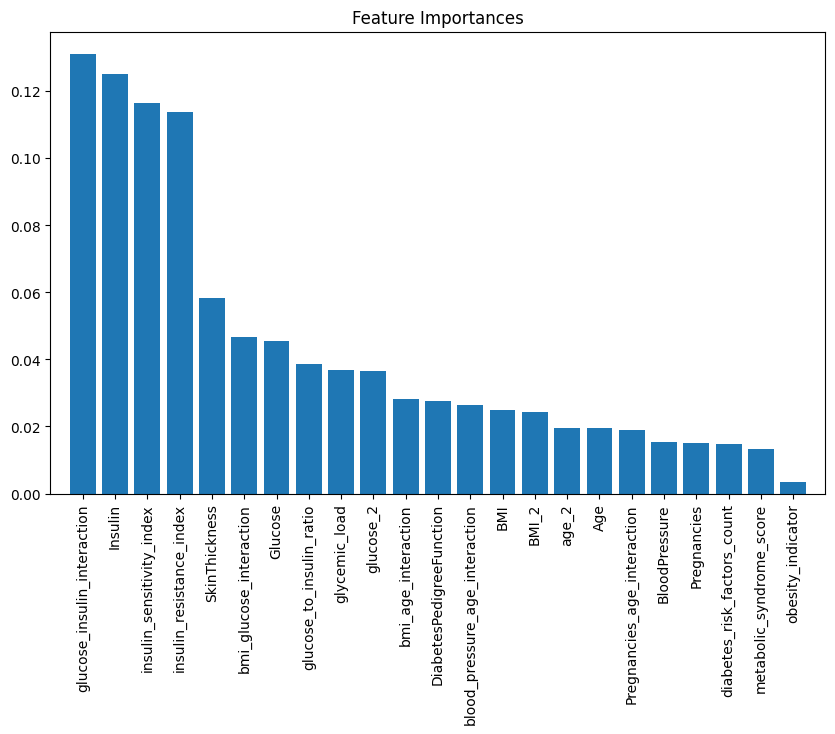

In [6]:
importance = plot_feature_importances(model, X_train.columns)

In [7]:
importance = importance[importance['Importance'] > 0.02]
feature_names = importance['Feature'].tolist()

X_train = X_train[feature_names]
X_test = X_test[feature_names]
feature_names

['glucose_insulin_interaction',
 'Insulin',
 'insulin_sensitivity_index',
 'insulin_resistance_index',
 'SkinThickness',
 'bmi_glucose_interaction',
 'Glucose',
 'glucose_to_insulin_ratio',
 'glycemic_load',
 'glucose_2',
 'bmi_age_interaction',
 'DiabetesPedigreeFunction',
 'blood_pressure_age_interaction',
 'BMI',
 'BMI_2']

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model = train_model(model,X_train, y_train)
metric = evaluate_model(model, X_test, y_test)

Accuracy: 0.89
Confusion Matrix:
[[93  7]
 [10 44]]
Classification Report:
{'0': {'precision': 0.9029126213592233, 'recall': 0.93, 'f1-score': 0.916256157635468, 'support': 100.0}, '1': {'precision': 0.8627450980392157, 'recall': 0.8148148148148148, 'f1-score': 0.8380952380952381, 'support': 54.0}, 'accuracy': 0.8896103896103896, 'macro avg': {'precision': 0.8828288596992195, 'recall': 0.8724074074074074, 'f1-score': 0.8771756978653531, 'support': 154.0}, 'weighted avg': {'precision': 0.88882790538987, 'recall': 0.8896103896103896, 'f1-score': 0.8888490819525302, 'support': 154.0}}


In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42,max_iter=20000 )
model = train_model(model,X_train, y_train)
metric = evaluate_model(model, X_test, y_test)

Accuracy: 0.75
Confusion Matrix:
[[87 13]
 [25 29]]
Classification Report:
{'0': {'precision': 0.7767857142857143, 'recall': 0.87, 'f1-score': 0.8207547169811321, 'support': 100.0}, '1': {'precision': 0.6904761904761905, 'recall': 0.5370370370370371, 'f1-score': 0.6041666666666666, 'support': 54.0}, 'accuracy': 0.7532467532467533, 'macro avg': {'precision': 0.7336309523809523, 'recall': 0.7035185185185185, 'f1-score': 0.7124606918238994, 'support': 154.0}, 'weighted avg': {'precision': 0.7465213358070502, 'recall': 0.7532467532467533, 'f1-score': 0.7448082577799559, 'support': 154.0}}


c:\Users\MARIE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', random_state=42)
model = train_model(model,X_train, y_train)
metric = evaluate_model(model, X_test, y_test)

Accuracy: 0.81
Confusion Matrix:
[[82 18]
 [11 43]]
Classification Report:
{'0': {'precision': 0.8817204301075269, 'recall': 0.82, 'f1-score': 0.8497409326424871, 'support': 100.0}, '1': {'precision': 0.7049180327868853, 'recall': 0.7962962962962963, 'f1-score': 0.7478260869565218, 'support': 54.0}, 'accuracy': 0.8116883116883117, 'macro avg': {'precision': 0.7933192314472061, 'recall': 0.8081481481481481, 'f1-score': 0.7987835097995044, 'support': 154.0}, 'weighted avg': {'precision': 0.8197247842937955, 'recall': 0.8116883116883117, 'f1-score': 0.8140045581811746, 'support': 154.0}}


In [11]:
#from scipy.stats import randint
#model = hyperparameter_tuning(X_train, y_train,model=RandomForestClassifier(random_state=42), param_distributions = {
#    'n_estimators': randint(300, 1000),             # Number of trees
#    'max_depth': [None] + list(range(5, 50, 5)),   # Tree depth
#    'min_samples_split': randint(2, 20),           # Minimum samples to split a node
#    'min_samples_leaf': randint(1, 20),            # Minimum samples at a leaf node
#    'max_features': ['sqrt', 'log2', None],                    # Use bootstrap samples
#    'criterion': ['gini', 'entropy', 'log_loss']   # Splitting criteria
#})

In [12]:
model = RandomForestClassifier(random_state=47,criterion='log_loss',max_depth=17,max_features=None,min_samples_leaf=10,min_samples_split=22,n_estimators=593)
model = train_model( model,X_train, y_train) 
metric = evaluate_model(model, X_test, y_test)

Accuracy: 0.90
Confusion Matrix:
[[93  7]
 [ 8 46]]
Classification Report:
{'0': {'precision': 0.9207920792079208, 'recall': 0.93, 'f1-score': 0.9253731343283582, 'support': 100.0}, '1': {'precision': 0.8679245283018868, 'recall': 0.8518518518518519, 'f1-score': 0.8598130841121495, 'support': 54.0}, 'accuracy': 0.9025974025974026, 'macro avg': {'precision': 0.8943583037549039, 'recall': 0.8909259259259259, 'f1-score': 0.8925931092202539, 'support': 154.0}, 'weighted avg': {'precision': 0.9022541068122986, 'recall': 0.9025974025974026, 'f1-score': 0.9023845452915058, 'support': 154.0}}


In [13]:
import joblib

# Save model
joblib.dump(model, config.MODEL_PATH)


['c:\\Users\\MARIE\\Desktop\\TERENCE\\PROJECT.ME\\Computer\\Diabetes classifier\\models\\diabetes_model.pkl']